## Lesson 8. Probability I

[Software, Data and
Technology](https://lp.jetbrains.com/software-data-and-technology-constructor-university/) bachelor program at [Constructor
University](https://constructor.university) (Bremen).

*Ilya Schurov, 2024*

*The explanations are mostly auto-generated using Claude Sonnet-3.5 model*



In this lesson, we'll explore basic concepts of probability using Python. We'll use the `random` module for generating random numbers and `numpy` for more advanced statistical operations.

In [1]:
import numpy as np

In [2]:
import random
import pandas as pd

### Basic (pseudo) random number generation

In [3]:
random.randint(1, 6)

5

The `random.randint(a, b)` function generates a random integer N such that $a \le N \le b$. In this case, we're generating a random integer between 1 and 6, inclusive. This simulates rolling a die.

Note that each time you run this cell, you'll likely get a different result due to the random nature of the function. This is a fundamental concept in probability: randomness and unpredictability of individual outcomes.

In [4]:
random.randint(1, 6)

1

However, in fact, these numbers are not truly random. They are generated using so-called pseudorandom number generator. The generator maintains some internal state. Each time you execute a function that uses the generator (like `random.randint` above), it generates a number using the internal state, and then change the state. Both operations are determenistic, though the result is indestinguishable from the true randomness for most of practical purposes (except of cryptography).

At the same time, you can use the fact that these numbers are not truly random, to make your experiments reproducible. To this end, we have to put the pseudo-random number generator in some specific state at the beginning. That is done using `random.seed` function.

In [24]:
random.seed(42)
for i in range(5):
    print(random.randint(1, 6))

6
1
1
6
3


Here we use `random.seed` to fix a state of random number generator at the beginning of the loop. If you run the same code twice, the results will be the same.

In [25]:
random.seed(42)
for i in range(5):
    print(random.randint(1, 6))

6
1
1
6
3


### Generating random numbers in batch using `np.random`

If we do efficiently generate several random numbers, we can use functions from `np.random`. Like this:

In [7]:
np.random.randint(1, 6, size=5)

array([5, 3, 1, 4, 1])

Note that `random.seed` does not work with `np.random`, as it uses independent instance of random number genrator.

In [8]:
random.seed(42)
np.random.randint(1, 6, size=5)


array([2, 5, 2, 4, 3])

In [9]:
random.seed(42)
np.random.randint(1, 6, size=5)


array([4, 5, 2, 3, 2])

To fix the seed in numpy generated code, you need to use `np.random.seed` instead: 

In [10]:
np.random.seed(42)
np.random.randint(1, 6, size=5)


array([4, 5, 3, 5, 5])

In [11]:
np.random.seed(42)
np.random.randint(1, 6, size=5)

array([4, 5, 3, 5, 5])

In the following code snippet, we demonstrate the use of NumPy's `random.binomial()` function to generate random samples from a binomial distribution. The binomial distribution models the number of successes in a fixed number of independent Bernoulli trials, like a tossing of a coin.

The function `np.random.binomial()` takes three main parameters:
- `n`: The number of trials, i.e. coin-tosses (3 in this case)
- `p`: The probability of success (i.e. getting a head from the tossing) for each trial (0.5, or 50% chance of success, corresponds to a fair coin)
- `size`: The number of samples to generate (10,000,000 in this example)

This large sample size allows us to approximate the theoretical binomial distribution closely. The resulting array `x` contains 10 million random values, each representing the number of successes (0, 1, 2, or 3) in 3 trials with a 50% success rate per trial.

In [12]:
x = np.random.binomial(n=3, p=0.5, size=(10000000))

We can analyze the distribution of our generated samples using pandas:

In [13]:
pd.Series(x).value_counts(normalize=True).sort_index()

0    0.125062
1    0.374914
2    0.375123
3    0.124901
Name: proportion, dtype: float64

The output above displays the proportion of each outcome (0, 1, 2, or 3 successes) in our sample. This is achieved using `value_counts()` with `normalize=True` to calculate proportions instead of counts. The `sort_index()` method ensures the results are sorted by the number of successes.

These proportions closely match the theoretical probabilities of a binomial distribution with n=3 and p=0.5:

In [14]:
1 / 8

0.125

In [15]:
3 / 8

0.375

### Visualizing probability distributions

Now we explore different probability distributions and their visualizations.

In [16]:
sample = np.random.uniform(0, 2, size=10000000)

We generate a uniform distribution sample using `np.random.uniform()`. This function creates 10 million random numbers between 0 and 2. The large sample size ensures a robust representation of the uniform distribution, which we'll use for comparison with other distributions.

In [17]:
import matplotlib.pyplot as plt

(array([0.49882017, 0.50003517, 0.49667017, 0.49935017, 0.49978017,
        0.50082017, 0.49878017, 0.49867017, 0.49946017, 0.49910517,
        0.50115517, 0.49786017, 0.49961517, 0.49978017, 0.49933517,
        0.49811517, 0.49936017, 0.49794517, 0.49874517, 0.50097017,
        0.49941517, 0.50216017, 0.50131517, 0.49971517, 0.49847517,
        0.49966517, 0.50020017, 0.50347017, 0.50198017, 0.49968517,
        0.49970017, 0.50082017, 0.49937517, 0.49891017, 0.49860517,
        0.50168017, 0.49917517, 0.50022017, 0.50039017, 0.49901017,
        0.49765517, 0.50254017, 0.49644517, 0.50078017, 0.50095017,
        0.49880517, 0.50130017, 0.49917017, 0.50011017, 0.50009017,
        0.50328517, 0.50270517, 0.49952517, 0.49925517, 0.50039517,
        0.49916017, 0.50272017, 0.50073517, 0.49939017, 0.49939517,
        0.50128017, 0.50197517, 0.49896517, 0.50224517, 0.49872517,
        0.50157517, 0.50144517, 0.50226017, 0.50099017, 0.49977017,
        0.49911017, 0.49855517, 0.50007517, 0.49

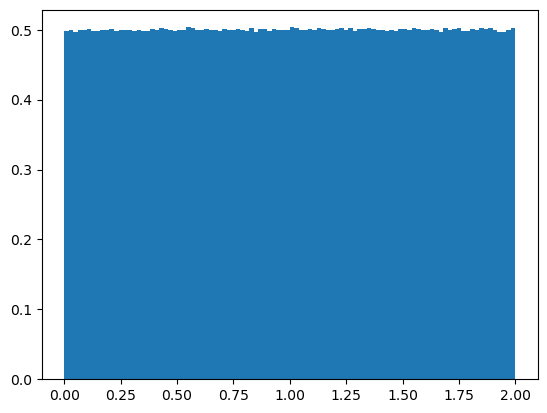

In [18]:
plt.hist(sample, density=True, bins=100)

This histogram visualizes the uniform distribution we created earlier. The roughly equal height of bars across the entire range is characteristic of a uniform distribution, where all values within the range have an equal probability of occurrence.

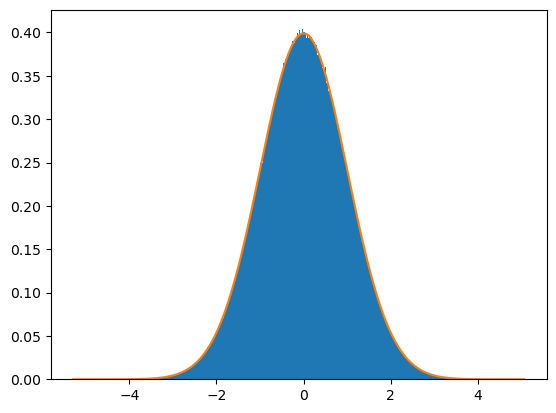

In [19]:
sample = np.random.normal(0, 1, size=10000000)
plt.hist(sample, density=True, bins=2000)
x = np.linspace(min(sample), max(sample), 301)
plt.plot(x, 1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2))

Here, we generate a sample from a standard normal (Gaussian) distribution using `np.random.normal()`. The histogram displays the distribution of this large sample (10 million points). We overlay the theoretical probability density function of the standard normal distribution, given by the formula `1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2)`. This creates the familiar bell-shaped curve.

The close match between the histogram and the theoretical curve demonstrates the power of the law of large numbers: as our sample size increases, the empirical distribution converges to the theoretical one. The smoothness of the histogram, due to the large number of bins (2000), allows for a detailed visualization of this convergence.

### Using `scipy.stats` for probability distributions

Another way to work with random numbers of different distributions is to use `scipy.stats`. It allows you not only generate random numbers, but also obtain an access to their various features, like probability density function, cumulalative distribution function, expected values, etc.

In [20]:
import scipy
import scipy.stats

In [21]:
standard_normal_random_variable = scipy.stats.norm(0, 1)

Here, we create a standard normal random variable using `scipy.stats.norm(0, 1)`. The output array shows 10 random samples drawn from this distribution, demonstrating values typically between -2 and 2.

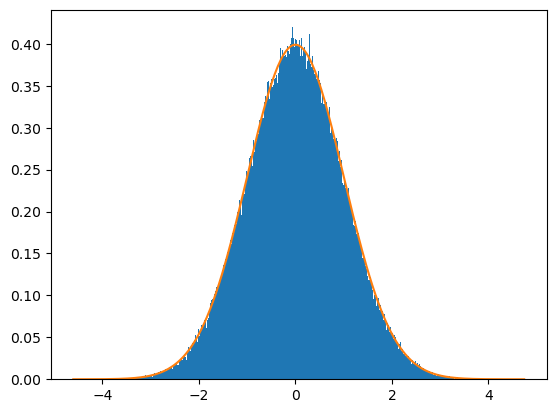

In [22]:
sample = standard_normal_random_variable.rvs(1000000)
plt.hist(sample, density=True, bins=2000)
x = np.linspace(min(sample), max(sample), 301)
plt.plot(x, standard_normal_random_variable.pdf(x))

This code generates a large sample from the standard normal distribution and visualizes it. The `rvs` method draws 1,000,000 random samples, creating a robust dataset. `plt.hist()` creates a histogram with 2000 bins, providing a detailed view of the distribution. The `density=True` parameter normalizes the histogram, making it comparable to the probability density function (PDF). 

The theoretical PDF is then plotted over the histogram using `plt.plot()`. The `np.linspace()` function creates 301 evenly spaced points between the minimum and maximum sample values, providing a smooth curve for the PDF. This overlay allows for a visual comparison between the sampled data and the theoretical distribution, illustrating how closely a large sample approximates the true standard normal distribution.

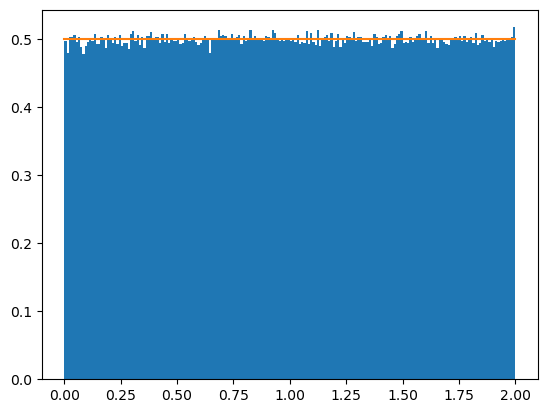

In [23]:
uniform_random_variable = scipy.stats.uniform(0, 2)
sample = uniform_random_variable.rvs(1000000)
plt.hist(sample, density=True, bins=200)
x = np.linspace(min(sample), max(sample), 301)
plt.plot(x, uniform_random_variable.pdf(x))

In this example, we create a uniform random variable using `scipy.stats.uniform(0, 2)`, which generates values uniformly distributed between 0 and 2. Similar to the previous example, we draw 1000,000 samples and create a histogram. The theoretical PDF of the uniform distribution is then overlaid on the histogram. 

The uniform distribution's PDF is a constant value within its range, which should be evident in the resulting plot as a flat line over the histogram. This visualization helps to contrast the uniform distribution with the bell-shaped normal distribution seen earlier, highlighting the differences in probability distributions.

That's all for today!